In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
from scipy import stats

In [2]:
transactions = pd.read_csv("./data/dh_transactions.csv")

In [3]:
transactions.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')

In [21]:
baskets = transactions.groupby(['basket'])

In [22]:
item_counts = baskets["units"].sum().value_counts().to_numpy()

In [6]:
item_counts[4] = np.sum(item_counts[4:])
item_counts = item_counts[:5]

In [7]:
item_counts

array([1725737,  922068,  351776,  174656,  142112])

Text(0.5, 1.0, 'Amount of items brought per basket')

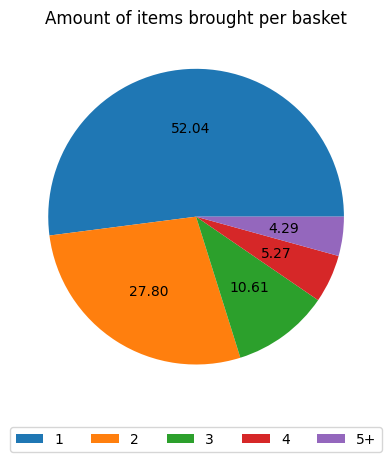

In [8]:
plt.pie(item_counts, labels = ["1","2","3","4","5+"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("Amount of items brought per basket")

In [23]:
value_per_baskets = baskets['dollar_sales'].sum().to_numpy()
#remove outlier
value_per_baskets = value_per_baskets[value_per_baskets<=100]

In [11]:
a = []
bins = np.arange(0,101,10)
for idx in range(1,len(bins)):
    a.append(((bins[idx-1] < value_per_baskets) & (value_per_baskets < bins[idx])).sum())  

Text(0.5, 1.0, 'Value of items in each basket')

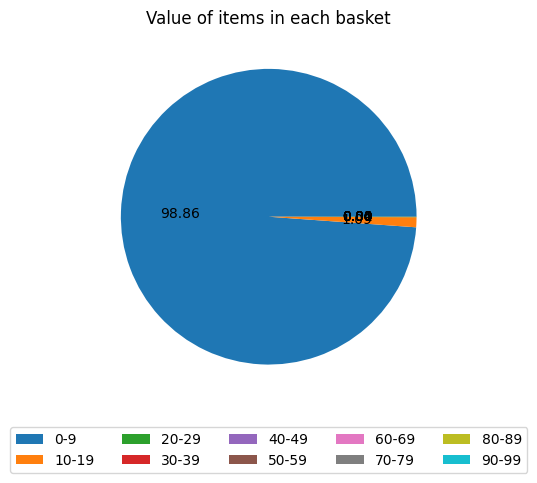

In [12]:
plt.pie(a, labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("Value of items in each basket")

In [13]:
a = []
bins = np.arange(0,10,1)
for idx in range(1,len(bins)):
    a.append(((bins[idx-1] < value_per_baskets) & (value_per_baskets < bins[idx])).sum())  

Text(0.5, 1.0, 'Total value of items in each basket')

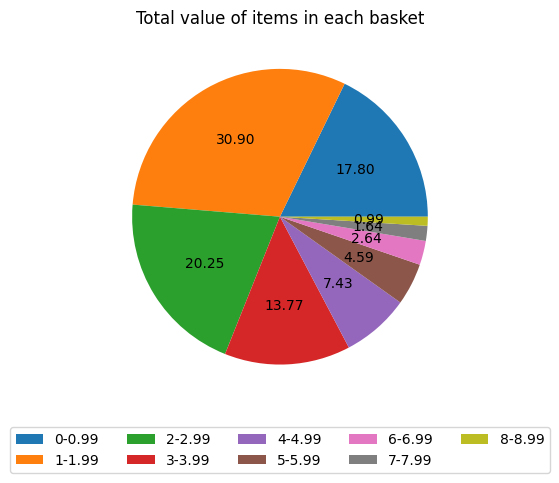

In [14]:
plt.pie(a, labels = ["0-0.99","1-1.99","2-2.99","3-3.99","4-4.99","5-5.99","6-6.99","7-7.99","8-8.99"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("Total value of items in each basket")

In [91]:
times = (baskets['time_of_transaction'].sum()/baskets.size()).to_numpy()

In [25]:
bins = np.arange(0,2401,100)

(array([ 17626.,   9200.,   4860.,   3181.,   2546.,   3386.,   7819.,
         20858.,  53273., 100350., 161182., 220304., 246671., 255074.,
        270206., 291236., 332335., 360123., 327284., 248611., 173088.,
        110188.,  62655.,  34293.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400.]),
 <BarContainer object of 24 artists>)

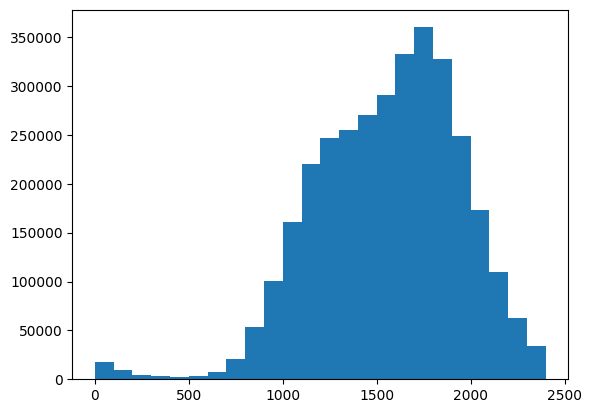

In [26]:
plt.hist(times, bins = bins)

In [92]:
weeks = (baskets['week'].sum()/baskets.size())

In [28]:
basket_per_weeks = weeks.value_counts().sort_index()

<BarContainer object of 104 artists>

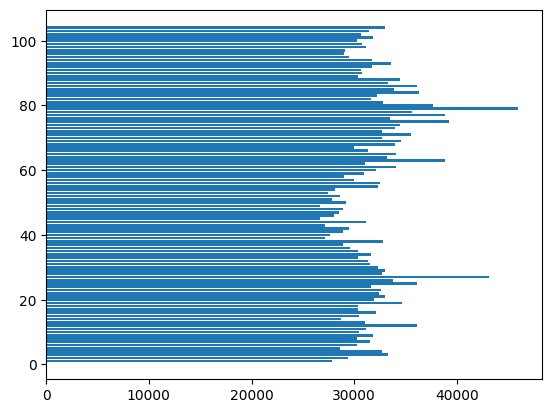

In [93]:
plt.barh(basket_per_weeks.index,basket_per_weeks)

In [94]:
sale_per_weeks = baskets['dollar_sales'].sum()

In [95]:
sale_each_weeks = np.zeros(105)
for idx,val in sale_per_weeks.items():
    sale_each_weeks[int(weeks[idx])] += val

<BarContainer object of 105 artists>

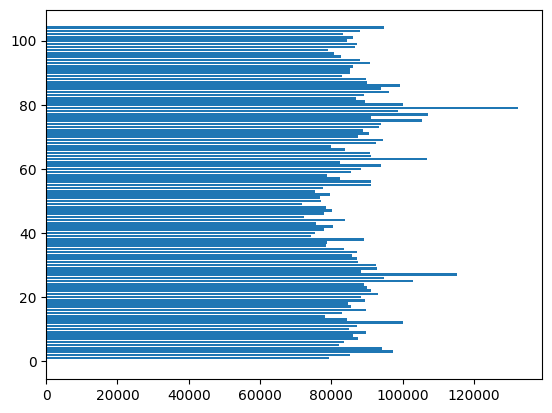

In [96]:
plt.barh(np.arange(0,105,1),sale_each_weeks)

In [97]:
coupon_usage = transactions[transactions["coupon"] == 1]["week"].value_counts().sort_index()

<BarContainer object of 104 artists>

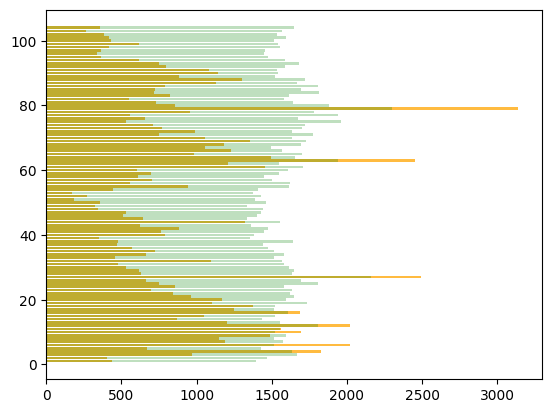

In [98]:
plt.barh(coupon_usage.index,coupon_usage,color = "orange",alpha=0.75)
plt.barh(basket_per_weeks.index,basket_per_weeks/20,color="green",alpha=0.25)

In [99]:
stats.pearsonr(coupon_usage,basket_per_weeks)

PearsonRResult(statistic=0.5565020263304891, pvalue=8.57734078242393e-10)

In [100]:
stats.pearsonr(coupon_usage,sale_each_weeks[1:])

PearsonRResult(statistic=0.5635448317067631, pvalue=4.716684683874298e-10)

In [43]:
stats.pearsonr(sale_each_weeks[1:53],sale_each_weeks[53:])

PearsonRResult(statistic=0.6960518821298138, pvalue=1.0118562978458581e-08)

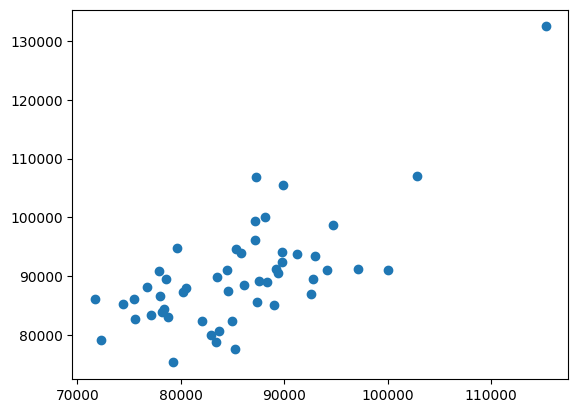

In [44]:
plt.scatter(sale_each_weeks[1:53],sale_each_weeks[53:])

In [71]:
#Sanity Check(each basket only have 1 household)
s = time.time()
for basket_id in range(1,3316349+1):
    basket_data = baskets.get_group(basket_id)
    if len(basket_data["household"].unique()) < 1:
        print(basket_id)
    if basket_id%200000 == 0:
        e = time.time()
        print(f"basket : {basket_id}, time: {e-s}")

basket : 200000, time: 22.477588891983032
basket : 400000, time: 47.12642192840576
basket : 600000, time: 78.76233172416687
basket : 800000, time: 112.00386667251587
basket : 1000000, time: 141.97173881530762
basket : 1200000, time: 169.05541682243347
basket : 1400000, time: 199.4363887310028
basket : 1600000, time: 228.83116388320923
basket : 1800000, time: 258.3378686904907
basket : 2000000, time: 289.32449102401733
basket : 2200000, time: 322.482807636261
basket : 2400000, time: 352.1763927936554
basket : 2600000, time: 381.88749384880066
basket : 2800000, time: 413.18254470825195
basket : 3000000, time: 442.8857510089874
basket : 3200000, time: 472.51234769821167


In [47]:
transactions.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')

In [86]:
# Count number of time each household brought from our store
s = time.time()
counter = defaultdict(int)
for basket_id in range(1,3316349+1):
    basket_data = baskets.get_group(basket_id)
    counter[basket_data["household"].values[0]] += 1
    if basket_id%200000 == 0:
        e = time.time()
        print(f"basket : {basket_id}, time: {e-s}")

basket : 200000, time: 22.0605890750885
basket : 400000, time: 45.30644512176514
basket : 600000, time: 68.10365700721741
basket : 800000, time: 88.9504120349884
basket : 1000000, time: 109.6836850643158
basket : 1200000, time: 130.2289378643036
basket : 1400000, time: 153.18906497955322
basket : 1600000, time: 177.4436719417572
basket : 1800000, time: 199.4476101398468
basket : 2000000, time: 221.9935941696167
basket : 2200000, time: 243.11537098884583
basket : 2400000, time: 264.0030369758606
basket : 2600000, time: 284.8283619880676
basket : 2800000, time: 305.6133060455322
basket : 3000000, time: 328.6021809577942
basket : 3200000, time: 354.23278999328613


(array([4.80627e+05, 2.46860e+04, 3.87600e+03, 6.67000e+02, 1.31000e+02,
        2.50000e+01, 7.00000e+00, 5.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  1. ,  22.8,  44.6,  66.4,  88.2, 110. , 131.8, 153.6, 175.4,
        197.2, 219. ]),
 <BarContainer object of 10 artists>)

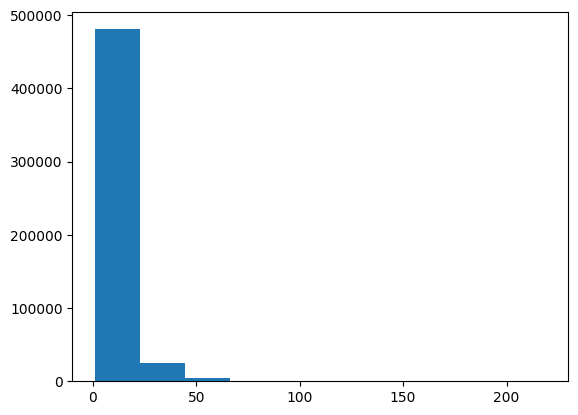

In [89]:
plt.hist(counter.values())